In [10]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob  # For sentiment analysis
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
try:
    df = pd.read_csv(r'E:\Chiranth\studies\miniproject\student_feedback.csv', encoding='latin-1')
except pd.errors.ParserError as e:
    print("ParserError:", e)
    # Skip bad lines
    df = pd.read_csv(r'E:\Chiranth\studies\miniproject\student_feedback.csv', encoding='latin-1', on_bad_lines='skip')

print(df.head())

                                            Feedback  Rating
0  The course was engaging, and I could apply the...       1
1  Not as good as expected. The instructor could ...       0
2  Fantastic! I really enjoyed the course. The pr...       1
3  The course content was difficult to follow. Co...       0
4  Absolutely loved this course! The assignments ...       1


In [14]:
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might", "professor", "lecture", "assignment"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)

# Preprocessing functions remain unchanged
def remove_special_character(content):
    return re.sub('\W+', ' ', content)

def remove_url(content):
    return re.sub(r'http\S+', '', content)

def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    return content

def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    return content

# Apply preprocessing
df['Feedback_clean'] = df['Feedback'].apply(data_cleaning)

# Data Analysis and Visualization remain unchanged


Unique feedback entries: 18
No of ratings: 350


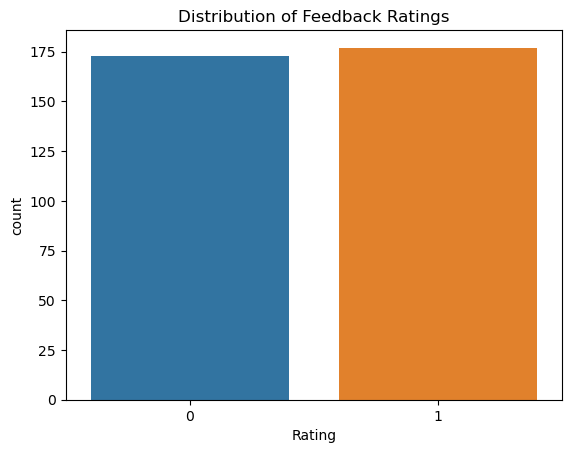

No positive feedback to generate word cloud.


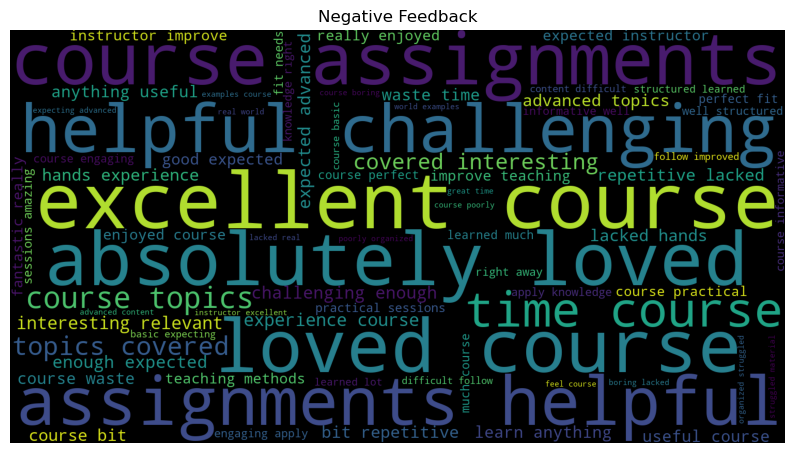

In [20]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Assuming the 'df' DataFrame already exists

print('Unique feedback entries: %s' % df.Feedback_clean.nunique())
print('No of ratings: %s' % df.Rating.count())

# Countplot of Ratings
sns.countplot(x=df['Rating'])
plt.title("Distribution of Feedback Ratings")
plt.show()

# Positive feedback: ratings >= 4
positive_feedback = ' '.join(df[df['Rating'] >= 4]['Feedback_clean'])

# Negative feedback: ratings <= 2
negative_feedback = ' '.join(df[df['Rating'] <= 2]['Feedback_clean'])

# Check if the positive_feedback is non-empty
if positive_feedback.strip():
    # Positive Word Cloud
    pos_wordcloud = WordCloud(width=1500, height=800, background_color='black', stopwords=stop_words, min_font_size=15).generate(positive_feedback)
    plt.figure(figsize=(10, 10))
    plt.imshow(pos_wordcloud)
    plt.title('Positive Feedback')
    plt.axis('off')
    plt.show()
else:
    print("No positive feedback to generate word cloud.")

# Check if the negative_feedback is non-empty
if negative_feedback.strip():
    # Negative Word Cloud
    neg_wordcloud = WordCloud(width=1500, height=800, background_color='black', stopwords=stop_words, min_font_size=15).generate(negative_feedback)
    plt.figure(figsize=(10, 10))
    plt.imshow(neg_wordcloud)
    plt.title('Negative Feedback')
    plt.axis('off')
    plt.show()
else:
    print("No negative feedback to generate word cloud.")


In [21]:
print(df.columns)

Index(['Feedback', 'Rating', 'Feedback_clean'], dtype='object')


In [22]:
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [8]:
!pip install prettytable

In [9]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [23]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Customize stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)

Dataset Preview:
                                            Feedback  Rating  \
0  The course was engaging, and I could apply the...       1   
1  Not as good as expected. The instructor could ...       0   
2  Fantastic! I really enjoyed the course. The pr...       1   
3  The course content was difficult to follow. Co...       0   
4  Absolutely loved this course! The assignments ...       1   

                                      Feedback_clean  
0         course engaging apply knowledge right away  
1  not good expected instructor improve teaching ...  
2  fantastic really enjoyed course practical sess...  
3           course content difficult follow improved  
4  absolutely loved course assignments helpful ch...  


In [73]:
# Functions for text preprocessing
def remove_special_character(content):
    return re.sub('\W+', ' ', content)

def remove_url(content):
    return re.sub(r'http\S+', '', content)

def remove_stopwords(content):
    clean_data = [word for word in content.split() if word.lower() not in stop_words and word.isalpha()]
    return " ".join(clean_data)

def contraction_expansion(content):
    content = re.sub(r"won\'t", "will not", content)
    content = re.sub(r"can\'t", "cannot", content)
    content = re.sub(r"n\'t", " not", content)
    return content

def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    return content

# Clean the feedback data
df['Feedback_clean'] = df['Teaching'].apply(data_cleaning)



In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, zero_division=0))

NameError: name 'y_test' is not defined

In [26]:
from collections import Counter
print("Class distribution in y_test:", Counter(y_test))
print("Class distribution in y_predict:", Counter(y_predict))

NameError: name 'y_test' is not defined

In [28]:
# Labeling feedback based on ratings
df['Label'] = df['Rating'].apply(lambda x: '1' if x >= 4 else '0')  # Positive (1) if rating >= 4, Negative (0) otherwise

# Prepare the data
data = df[['Feedback_clean', 'Label']]
train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

# Vectorization
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
x_train_tfidf = tfidf_vect.fit_transform(train['Feedback_clean']).toarray()
x_test_tfidf = tfidf_vect.transform(test['Feedback_clean']).toarray()

y_train = train['Label']
y_test = test['Label']

# Train the model
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)
"""
# Step 1: Clean data and prepare labels
data['Feedback_clean'] = data['Teaching'].apply(data_cleaning)
data['Label'] = data['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x <= 4 else '2'))
data = data[data['Label'] != '2']  # Remove neutral feedback
labels = data['Label']

# Step 2: Split the cleaned data
train_data, test_data, y_train, y_test = train_test_split(
    data['Feedback_clean'], labels, test_size=0.3, random_state=42, stratify=labels
)

# Step 3: Transform text using TfidfVectorizer
tfidfvect = TfidfVectorizer(analyzer="word", tokenizer=LemmaTokenizer(), ngram_range=(1, 3), min_df=10, max_features=10000)
x_train_tfidf = tfidfvect.fit_transform(train_data).toarray()
x_test_tfidf = tfidfvect.transform(test_data).toarray()

# Confirm dimensions
print(f"x_train_tfidf shape: {x_train_tfidf.shape}")
print(f"x_test_tfidf shape: {x_test_tfidf.shape}")
print(f"y_train length: {len(y_train)}")
print(f"y_test length: {len(y_test)}")
"""
model_1 = LogisticRegression()
model_1.fit(x_train_tfidf, y_train)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_predict))



ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: '0'

In [81]:
from sklearn.metrics import precision_score, roc_auc_score, f1_score

# Assuming:
# `x_train_tfidf`, `x_test_tfidf` are your TF-IDF transformed training and test sets.
# `y_train`, `y_test` are the corresponding labels for training and test sets.
# `model_1` is your trained Logistic Regression model.

# Metrics on the Training Dataset
print("Precision Score on training dataset for Logistic Regression: %s" % precision_score(
    y_train, 
    model_1.predict(x_train_tfidf), 
    average='micro'
))

print("AUC Score on training dataset for Logistic Regression: %s" % roc_auc_score(
    y_train, 
    model_1.predict_proba(x_train_tfidf)[:, 1],  # Ensure binary classification, or handle multi-class as required
    multi_class='ovo',  # "ovo" is used for multi-class classification
    average='macro'
))

f1_score_train_1 = f1_score(y_train, model_1.predict(x_train_tfidf), average="weighted")
print("F1 Score on training dataset for Logistic Regression: %s" % f1_score_train_1)

# Metrics on the Test Dataset
print("Precision Score on test dataset for Logistic Regression: %s" % precision_score(
    y_test, 
    model_1.predict(x_test_tfidf), 
    average='micro'
))

print("AUC Score on test dataset for Logistic Regression: %s" % roc_auc_score(
    y_test, 
    model_1.predict_proba(x_test_tfidf)[:, 1],  # Adjust based on multi-class handling
    multi_class='ovo', 
    average='macro'
))

f1_score_1 = f1_score(y_test, model_1.predict(x_test_tfidf), average="weighted")
print("F1 Score on test dataset for Logistic Regression: %s" % f1_score_1)


Precision Score on training dataset for Logistic Regression: 0.7286821705426356
AUC Score on training dataset for Logistic Regression: 0.9313186813186813
F1 Score on training dataset for Logistic Regression: 0.6347562500381192
Precision Score on test dataset for Logistic Regression: 0.7142857142857143
AUC Score on test dataset for Logistic Regression: 0.50546875
F1 Score on test dataset for Logistic Regression: 0.5952380952380951


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the dataset from an Excel file
# Make sure the file is in the same directory or provide the full path
data = pd.read_excel('finalDataset0.2.xlsx')

# Check the first few rows to understand the structure
print(data.head())

def generate_word_cloud(text, title="Word Cloud"):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()

# Combine positive and negative words
positive_feedback = " ".join(data[data['Sentiment'] == 'positive']['Feedback'])
negative_feedback = " ".join(data[data['Sentiment'] == 'negative']['Feedback'])

# Generate Word Cloud for Positive Feedback
generate_word_cloud(positive_feedback, title="Positive Sentiment Word Cloud")

# Generate Word Cloud for Negative Feedback
generate_word_cloud(negative_feedback, title="Negative Sentiment Word Cloud")

# Plotting the distribution of sentiments
sentiment_counts = data['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("Sentiment Distribution in Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Pie Chart for Sentiment Distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'], figsize=(8,8))
plt.title("Sentiment Distribution in Feedback")
plt.ylabel("")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'finalDataset0.2.xlsx'

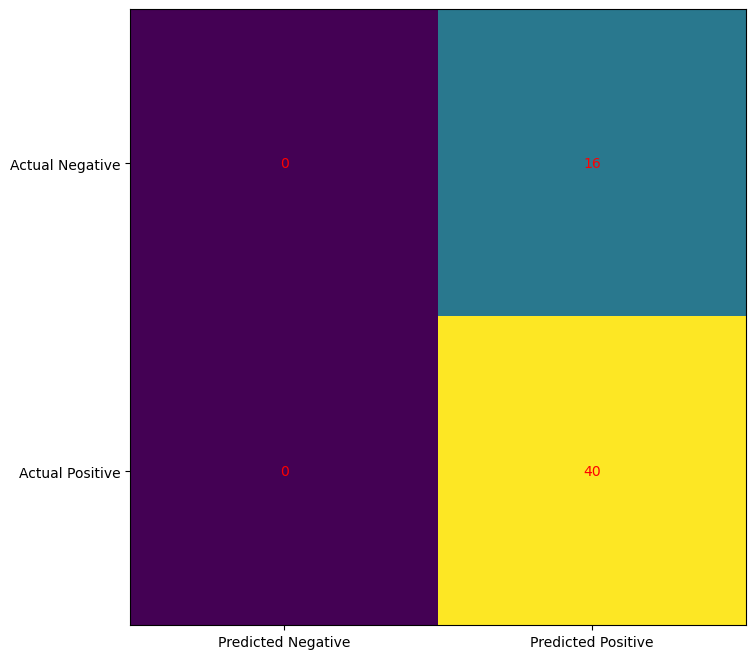

In [77]:
def confusion_matrix_plot(y_test, y_score):
    confmatrix = confusion_matrix(y_test, y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Negative', 'Predicted Positive'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Negative', 'Actual Positive'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

confusion_matrix_plot(y_test, y_predict)


In [56]:
# Features: transformed using TfidfVectorizer
x_tfidf = tfidfvect.fit_transform(data['Feedback_clean']).toarray()

# Labels: extracted and processed as a list
y = data['Label']

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    x_tfidf, y, test_size=0.3, random_state=42, stratify=y
)


In [57]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(
    x_train_tfidf, y_test, test_size=0.3, random_state=42, stratify=y_train
)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Confirm resampling
print("Original training set size:", len(x_train))
print("Resampled training set size:", len(x_train_resampled))


ValueError: Found input variables with inconsistent numbers of samples: [129, 56]

In [2]:

!pip install spacy
python -m spacy download en_core_web_sm


SyntaxError: invalid syntax (3151849891.py, line 2)

In [29]:
import pandas as pd
import random
from faker import Faker

# Initialize the Faker library to generate synthetic student names and feedback
fake = Faker()

# Generate synthetic data
data = []

ratings = [1, 2, 3, 4, 5]
feedbacks = {
    "positive": [
        "Excellent course! Learned a lot, the material was easy to follow.",
        "Great teaching style, really enjoyed the course and the content.",
        "Very informative and engaging, I learned a lot.",
        "The instructor was great, and the course content was very useful.",
        "I loved the course! It was very helpful for my career growth."
    ],
    "neutral": [
        "The course was okay, but could use some improvements.",
        "It was a decent course, but not very exciting.",
        "Content was okay, but could be more engaging.",
        "I found the course average. It could have been more interactive.",
        "The course was fine, but I expected more."
    ],
    "negative": [
        "I did not find the course helpful. It lacked depth.",
        "The instructor was not engaging, and the material was hard to understand.",
        "Not a good course. I felt lost throughout the content.",
        "Very poorly structured course, I couldn’t follow along.",
        "The content was outdated and not relevant."
    ]
}

# Generate data for 350+ students
num_students = 350
for _ in range(num_students):
    # Generate random name
    name = fake.name()
    
    # Randomly assign a rating (1-5)
    rating = random.choice(ratings)
    
    # Assign feedback based on rating
    if rating >= 4:
        feedback = random.choice(feedbacks["positive"])
        sentiment = "positive"
    elif rating == 3:
        feedback = random.choice(feedbacks["neutral"])
        sentiment = "neutral"
    else:
        feedback = random.choice(feedbacks["negative"])
        sentiment = "negative"
    
    data.append([name, rating, feedback, sentiment])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Student_Name", "Rating", "Feedback", "Sentiment"])

# Save to CSV
df.to_csv('student_feedback.csv', index=False)

print("CSV file with student feedback generated successfully!")


CSV file with student feedback generated successfully!


In [4]:
!pip install faker

     ---------------------------------------- 1.9/1.9 MB 8.0 MB/s eta 0:00:00


In [6]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\chira


In [31]:
df.to_csv('E:/Chiranth/studies/miniproject/student_feedback.csv', index=False)


In [2]:
import pandas as pd
import numpy as np
import random
from faker import Faker

# Initialize the Faker library to generate random names
fake = Faker()

# Function to generate random student reviews
def generate_student_data(num_students):
    data = []
    for _ in range(num_students):
        rating = random.randint(1, 5)  # Random rating between 1 and 5
        feedback = generate_feedback(rating)
        data.append([rating, feedback])
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=['Rating', 'Feedback'])
    return df

# Function to generate feedback based on rating
def generate_feedback(rating):
    if rating == 5:
        return fake.sentence(ext_word_list=["excellent", "amazing", "great", "outstanding", "perfect", "best"])
    elif rating == 4:
        return fake.sentence(ext_word_list=["good", "nice", "satisfactory", "worthwhile", "enjoyable"])
    elif rating == 3:
        return fake.sentence(ext_word_list=["okay", "neutral", "average", "not bad", "decent"])
    elif rating == 2:
        return fake.sentence(ext_word_list=["poor", "disappointing", "unpleasant", "not recommended"])
    else:
        return fake.sentence(ext_word_list=["terrible", "awful", "horrible", "worst", "regret", "unacceptable"])

# Generate multiple CSV files with 500+ students
num_students = 500
for i in range(1, 6):  # Generate 5 different files
    df = generate_student_data(num_students)
    file_name = f"student_feedback_{i}.csv"
    df.to_csv(file_name, index=False)
    print(f"File saved: {file_name}")


File saved: student_feedback_1.csv
File saved: student_feedback_2.csv
File saved: student_feedback_3.csv
File saved: student_feedback_4.csv
File saved: student_feedback_5.csv


In [7]:
df.to_csv('E:/Chiranth/studies/miniproject/student_feedback_5.csv', index=False)